<a href="https://colab.research.google.com/github/riz-coder/DL/blob/main/6_tranfer_learning_featureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:10<00:00, 140MB/s]
100% 1.06G/1.06G [00:10<00:00, 114MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top= False,   #Freeze the Convolution layer in this
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

- Just look at the last layer its the Convolution layer which we freeze no FC Layer
- If you want to add FC Layer part just simple make **include_top= True**

In [ ]:
# Now make our model and we add all conv layer which we freeze

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Now we have all layer

In [ ]:
#Freeze the Conv layer before training
conv_base.trainable = False

#Run the Below code if you want to do Transfer Learning means train some Convolution layer as well

'''

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = False
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name, layer.trainable)

'''

In [ ]:
#Agin check the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


- Now look at the trainable parameters

In [ ]:
#Generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/train'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/test'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (150,150)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize, Value between 0 to 1

def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 105ms/step - loss: 0.2709 - accuracy: 0.8845 - val_loss: 0.2084 - val_accuracy: 0.9122
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1892 - accuracy: 0.9212 - val_loss: 0.2430 - val_accuracy: 0.8980
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1630 - accuracy: 0.9326 - val_loss: 0.2427 - val_accuracy: 0.9002
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1330 - accuracy: 0.9474 - val_loss: 0.2448 - val_accuracy: 0.9066
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1166 - accuracy: 0.9528 - val_loss: 0.2592 - val_accuracy: 0.9034
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0900 - accuracy: 0.9636 - val_loss: 0.2632 - val_accuracy: 0.9104
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0712 - accuracy: 0.9724 - val_loss: 0.2620 - val_accuracy

- Look at the Accuracy now and previously when we trained on our own model its quite low

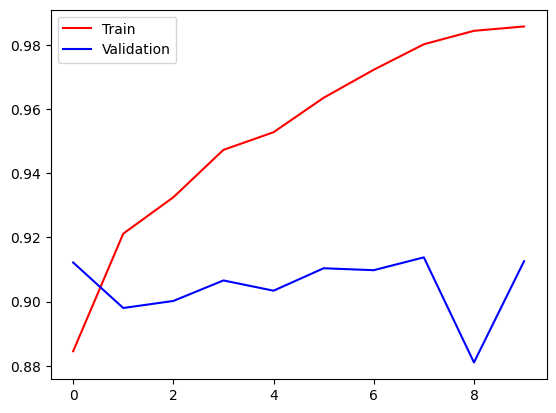

In [ ]:
# Plot the accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='Train')
plt.plot(history.history['val_accuracy'],color='blue', label='Validation')
plt.legend()
plt.show()

- Seems like Overfitting
- Use Data Augmentation here to avoid this

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat_dog.jpg')

array([[[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]],

       [[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]],

       [[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]],

       ...,

       [[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]],

       [[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]],

       [[171, 135,  20],
        [171, 135,  20],
        [171, 135,  20],
        ...,
        [171, 135,  20],
        [171, 135,  20],
        [171, 135,  20]]], dtype=uint8)
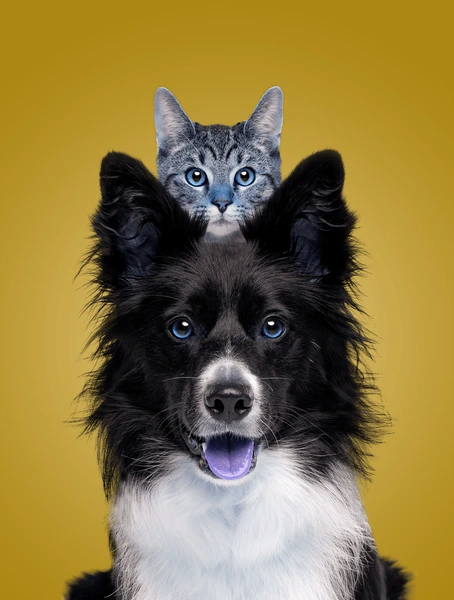

In [ ]:
test_img

In [ ]:
test_img = cv2.resize(test_img, (150,150))

In [ ]:
test_input = test_img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

- Cat label is 0
- Dog label is 1